# 📊 Stock Performance Data Collection with yFinance

This notebook collects historical stock price data for selected S&P 500 companies using the **yfinance** API.
The goal is to build a clean, structured dataset that can later be used for:
- Financial analysis
- Visualization in Excel or Tableau
- Return and volatility calculations
- Event-based analysis

**Time period:** January 1, 2025 to July 1, 2025  (First Half of 2025)
**Sectors covered:** Technology and Banking

I used:
- **yfinance** to fetch stock market data  
- **pandas** for data manipulation  
- **datetime** to define the date range dynamically

In [1]:

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


Each ticker represents a publicly traded firm.
These companies were selected to compare **tech vs financial institutions**.

- Apple (AAPL)
- NVIDIA (NVDA)
- JPMorgan Chase (JPM)
- Bank of America (BAC)
- Goldman Sachs (GS)
- Morgan Stanley (MS)
- Citigroup (C)
- Wells Fargo (WFC)

In [2]:
tickers = ['AAPL', 'NVDA', 'JPM', 'BAC', 'GS', 'MS', 'C', 'WFC']

I then analyzed the **180 trading days** leading up to **July 1, 2025**.
This captures recent market behavior while avoiding short-term noise.

In [3]:
end_date = datetime(2025, 7, 1)
start_date = end_date - timedelta(days=180)


Used a list to temporarily store each stock's DataFrame.
Later, all datasets will be combined into a single master table.


In [4]:

all_data_list = []



For each ticker:
- Download historical prices
- Reset the index so Date becomes a column
- Ensure consistent column structure
- Add a Ticker column for identification

This step prevents downstream issues during visualization or analysis.


In [5]:

for ticker in tickers:
    try:
        data = yf.download(
            ticker,
            start=start_date,
            end=end_date,
            auto_adjust=True
        )

        data['Ticker'] = ticker
        data.reset_index(inplace=True)

        if 'Adj Close' not in data.columns:
            data['Adj Close'] = data['Close']

        required_columns = [
            'Date', 'Open', 'High', 'Low',
            'Close', 'Adj Close', 'Volume', 'Ticker'
        ]

        for col in required_columns:
            if col not in data.columns:
                if col == 'Adj Close':
                    data[col] = data['Close']
                else:
                    data[col] = 0

        data = data[required_columns]
        all_data_list.append(data)

        print(f"✅ Downloaded data for {ticker}")
    except Exception as e:
        print(f"❌ Error downloading {ticker}: {e}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


✅ Downloaded data for AAPL
✅ Downloaded data for NVDA


[*********************100%***********************]  1 of 1 completed


✅ Downloaded data for JPM


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

✅ Downloaded data for BAC



[*********************100%***********************]  1 of 1 completed


✅ Downloaded data for GS
✅ Downloaded data for MS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

✅ Downloaded data for C
✅ Downloaded data for WFC




All individual stock tables are merged into a single DataFrame.
This format is ideal for:
- Tableau dashboards
- Excel pivot tables
- Python-based analysis


In [6]:

if all_data_list:
    all_data = pd.concat(all_data_list, ignore_index=True)

    print("Columns:", all_data.columns.tolist())
    print("Data shape:", all_data.shape)

    if isinstance(all_data.columns, pd.MultiIndex):
        all_data.columns = [
            col[0] if col[1] == '' else f"{col[0]}_{col[1]}"
            for col in all_data.columns
        ]

    all_data.to_excel('stock_data_raw.xlsx', index=False)

    print("✅ Data saved to stock_data_raw.xlsx")
    print("Total rows:", len(all_data))
else:
    print("❌ No data downloaded")


Columns: [('Date', ''), ('Open', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Close', 'AAPL'), ('Adj Close', ''), ('Volume', 'AAPL'), ('Ticker', ''), ('Open', 'NVDA'), ('High', 'NVDA'), ('Low', 'NVDA'), ('Close', 'NVDA'), ('Volume', 'NVDA'), ('Open', 'JPM'), ('High', 'JPM'), ('Low', 'JPM'), ('Close', 'JPM'), ('Volume', 'JPM'), ('Open', 'BAC'), ('High', 'BAC'), ('Low', 'BAC'), ('Close', 'BAC'), ('Volume', 'BAC'), ('Open', 'GS'), ('High', 'GS'), ('Low', 'GS'), ('Close', 'GS'), ('Volume', 'GS'), ('Open', 'MS'), ('High', 'MS'), ('Low', 'MS'), ('Close', 'MS'), ('Volume', 'MS'), ('Open', 'C'), ('High', 'C'), ('Low', 'C'), ('Close', 'C'), ('Volume', 'C'), ('Open', 'WFC'), ('High', 'WFC'), ('Low', 'WFC'), ('Close', 'WFC'), ('Volume', 'WFC')]
Data shape: (976, 43)
✅ Data saved to stock_data_raw.xlsx
Total rows: 976



## 📥 Importing Cleaned Excel Data into Python

After exporting the raw stock data to Excel, I used **Power Query Editor** to:
- Remove inconsistencies
- Standardize column names
- Validate missing values
- Prepare the dataset for analysis and visualization

This section imports the cleaned Excel file back into Python for validation
and additional calculations before visualization.

The Excel file is stored locally in the same project directory.
Using pandas, the cleaned dataset is loaded into a DataFrame.



In [7]:
df = pd.read_excel("stock_data.xlsx")
df.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume Traded
0,2025-01-02,AAPL,248.330961,248.500565,241.238085,243.263199,243.263199,55740700
1,2025-01-02,BAC,43.606222,44.050781,43.270334,43.754410,43.754410,25610600
2,2025-01-02,C,69.893242,70.109997,68.622275,68.907997,68.907997,9827400
3,2025-01-02,GS,573.592419,578.543071,564.116865,569.295227,569.295227,2219000
4,2025-01-02,JPM,237.072695,239.395009,235.626169,236.167389,236.167389,9220900


After cleaning and structuring the raw stock price data in Excel, we proceed with exploratory analysis and visualization in Python using Matplotlib. This step helps us understand price movements, volatility, trading activity, and overall performance of each stock over the past six months. The cleaned dataset has been added to the GitHub repository to ensure reproducibility and version control.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

df = pd.read_excel("stock_data.xlsx")   # adjust path if needed

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Ticker", "Date"])



In [9]:
adj_close = df.pivot(index="Date", columns="Ticker", values="Adj Close")


In [10]:
volume = df.pivot(index="Date", columns="Ticker", values="Volume Traded")


In [11]:
high = df.pivot(index="Date", columns="Ticker", values="High")
low  = df.pivot(index="Date", columns="Ticker", values="Low")

daily_range = high - low


In [12]:
daily_returns = adj_close.pct_change()


In [13]:
rolling_vol = daily_returns.rolling(window=20).std()


In [14]:
cum_gain = (1 + daily_returns).cumprod()


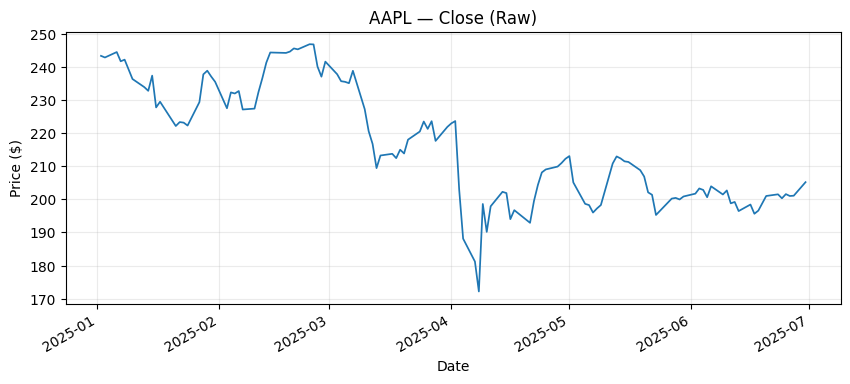

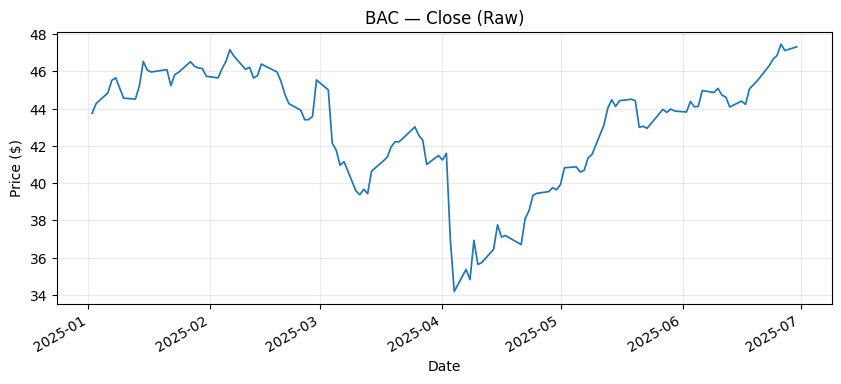

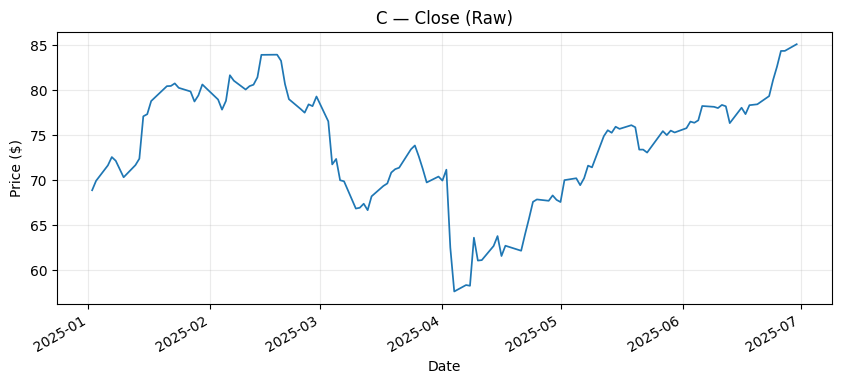

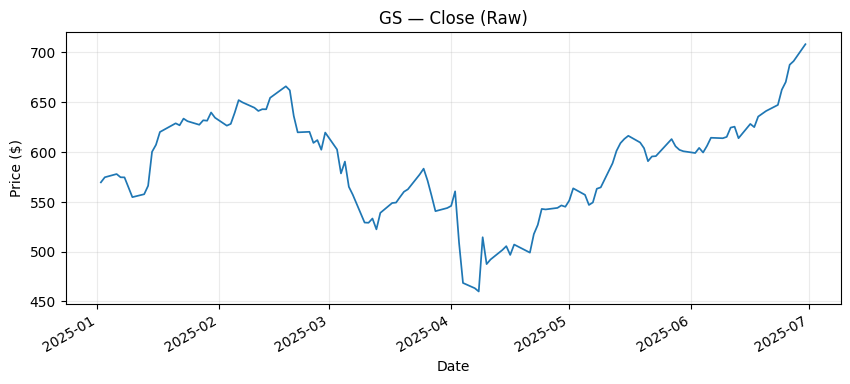

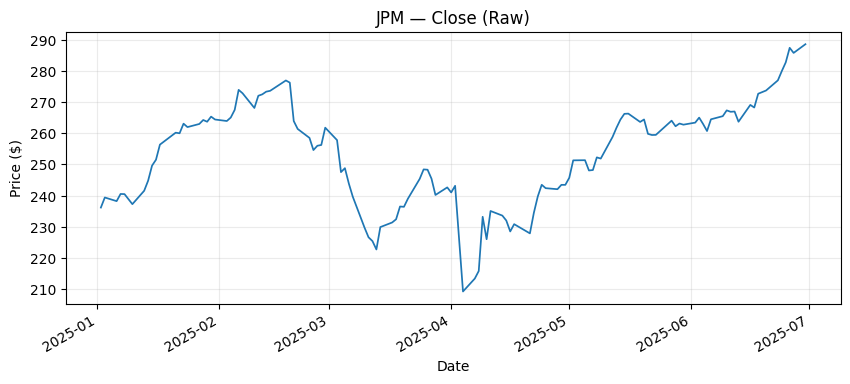

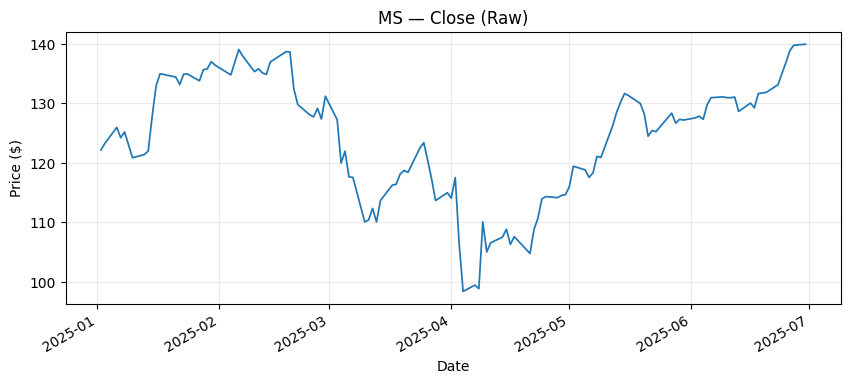

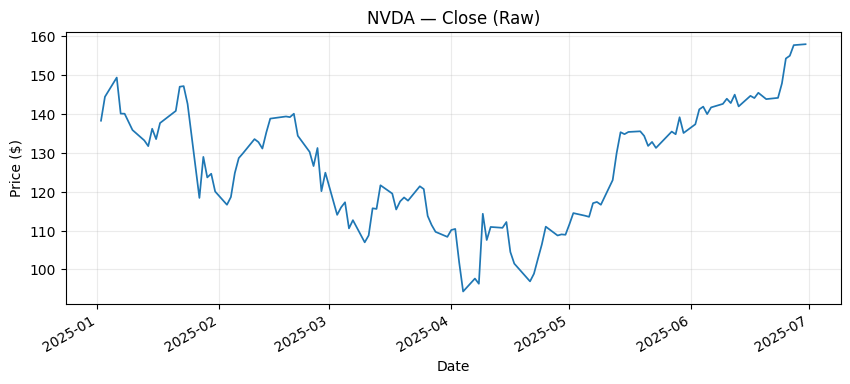

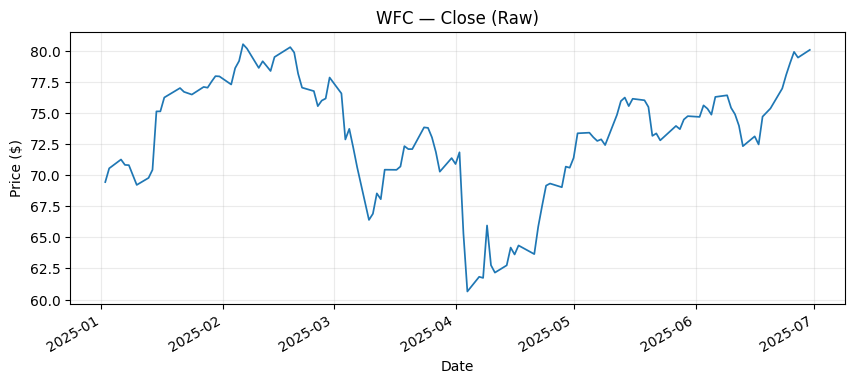

In [15]:
# Optional: make plots look consistent
plt.rcParams.update({
    "figure.figsize": (10, 4),
    "axes.grid": True,
    "grid.alpha": 0.25,
    "axes.titlesize": 12,
    "axes.labelsize": 10
})

# ---- 1) Close (raw) — 8 charts ----
for t in adj_close.columns:
    fig, ax = plt.subplots()
    s = adj_close[t].dropna()

    ax.plot(s.index, s.values, linewidth=1.25)
    ax.set_title(f"{t} — Close (Raw)")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price ($)")

    fig.autofmt_xdate()
    plt.show()
    plt.close(fig)


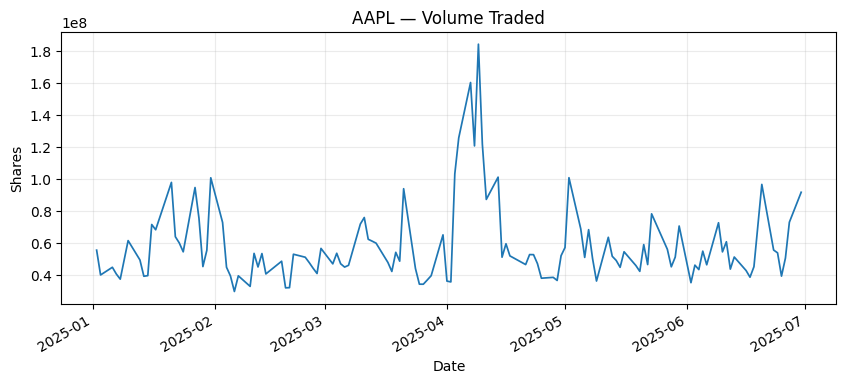

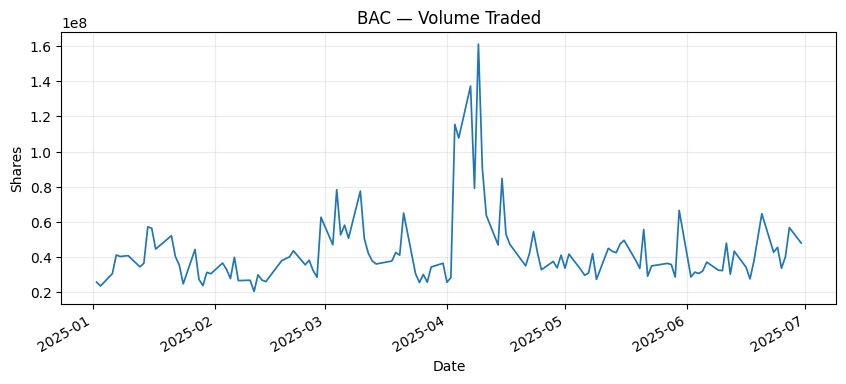

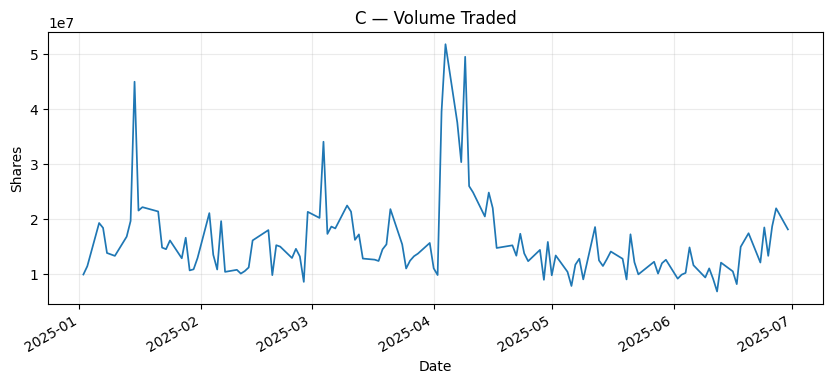

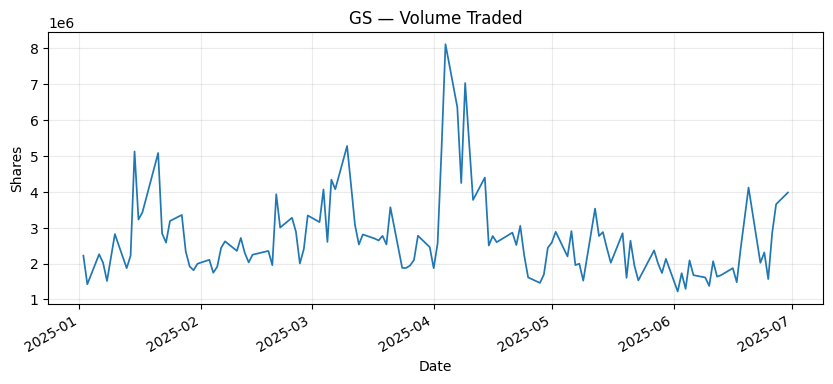

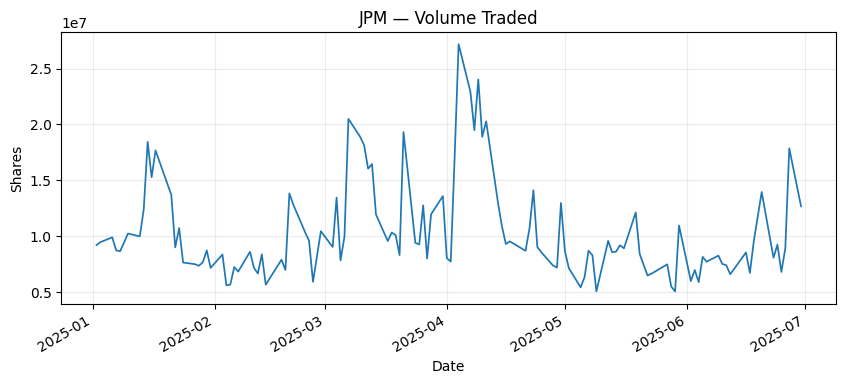

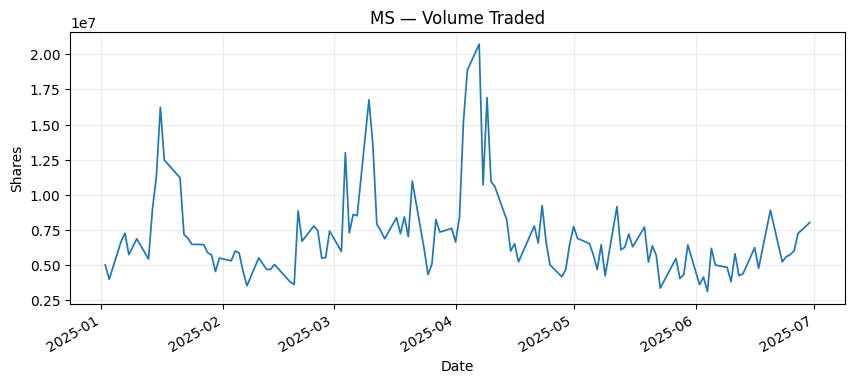

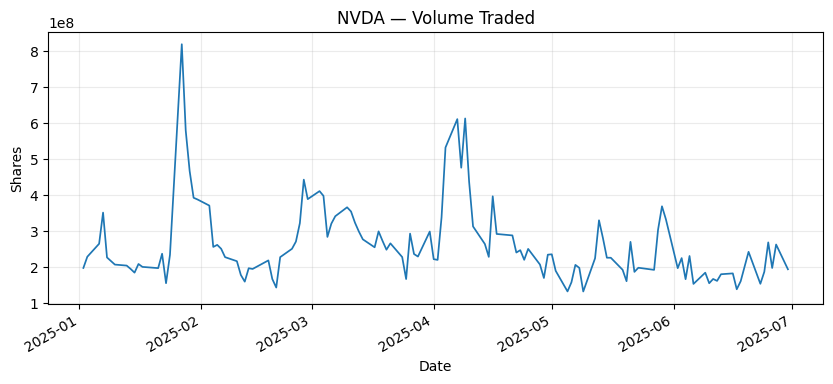

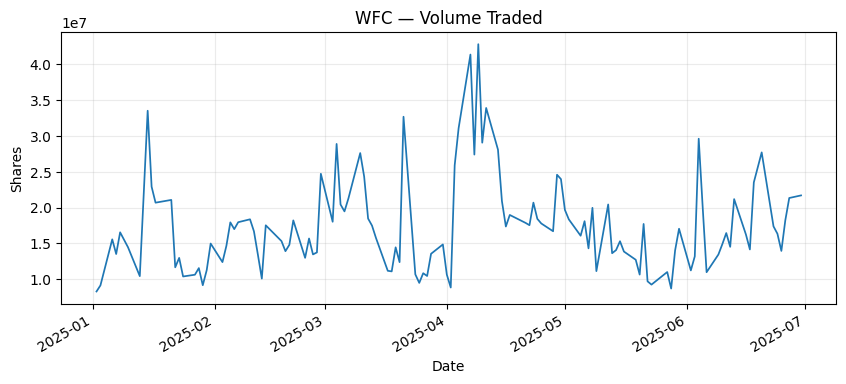

In [16]:
# ---- 2) Volume — 8 charts ----
for t in volume.columns:
    fig, ax = plt.subplots()
    s = volume[t].dropna()

    ax.plot(s.index, s.values, linewidth=1.25)
    ax.set_title(f"{t} — Volume Traded")
    ax.set_xlabel("Date")
    ax.set_ylabel("Shares")

    fig.autofmt_xdate()
    plt.show()
    plt.close(fig)


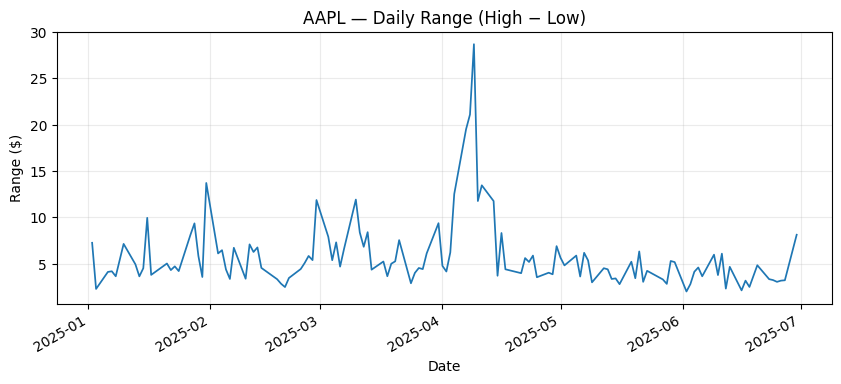

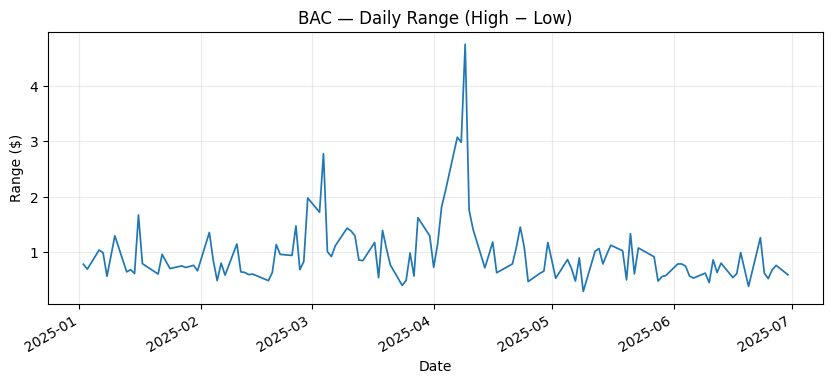

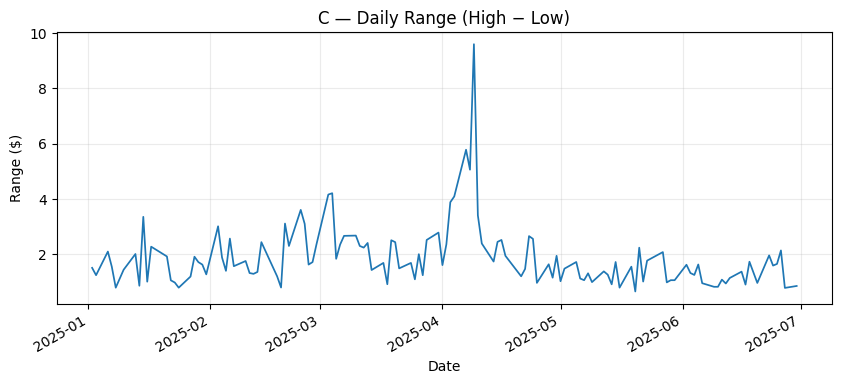

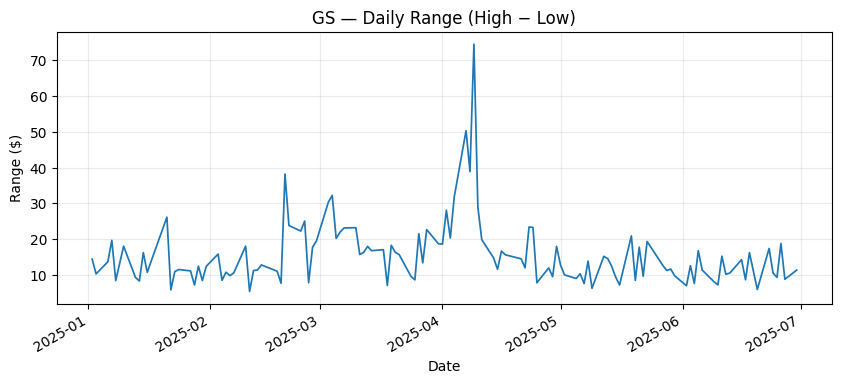

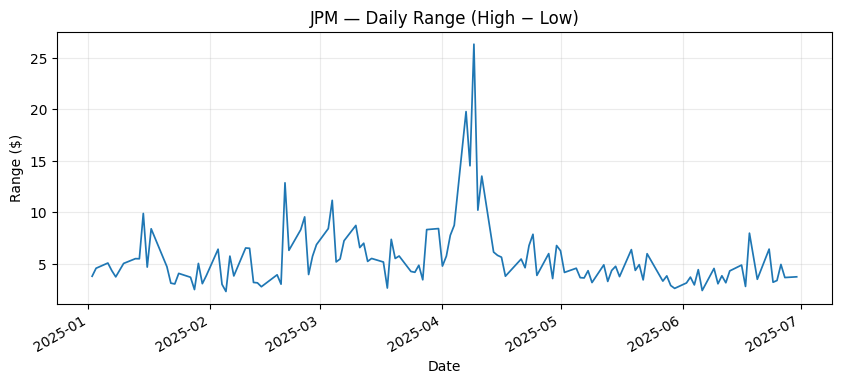

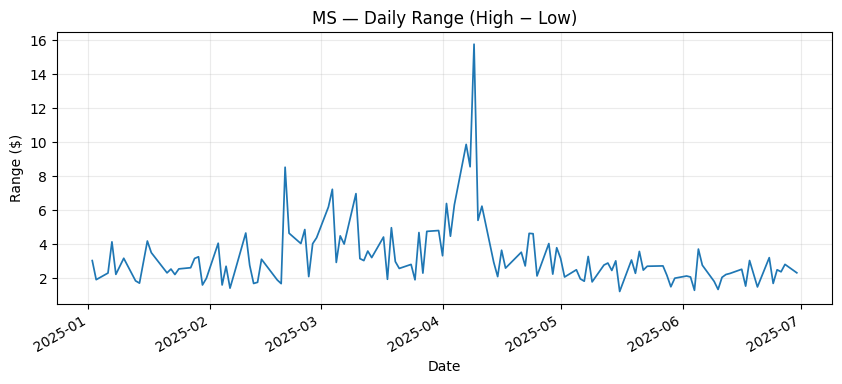

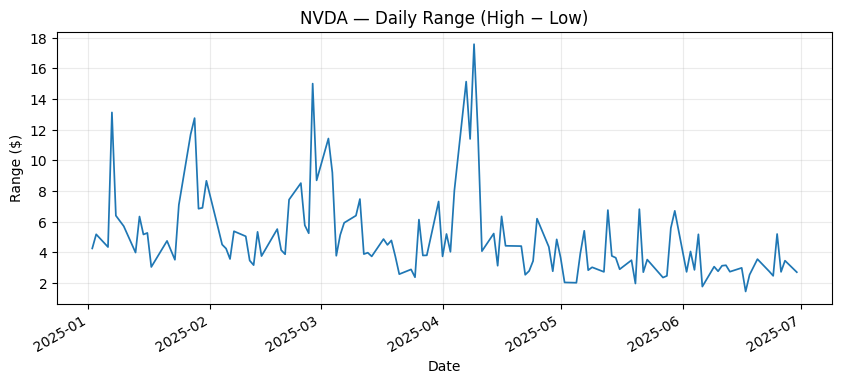

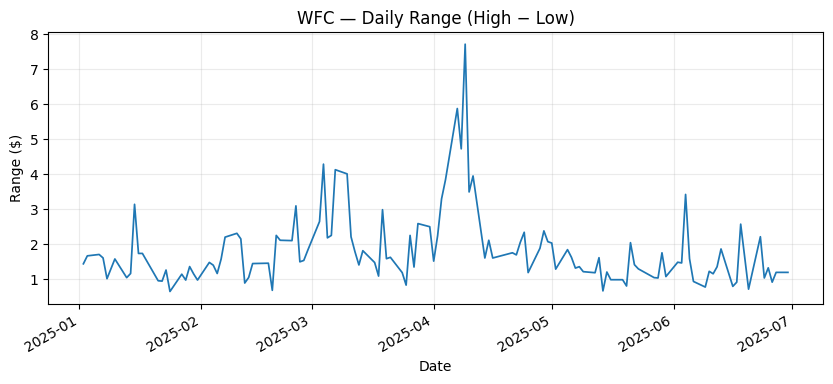

In [17]:
# ---- 3) Range (High − Low) — 8 charts ----
for t in daily_range.columns:
    fig, ax = plt.subplots()
    s = daily_range[t].dropna()

    ax.plot(s.index, s.values, linewidth=1.25)
    ax.set_title(f"{t} — Daily Range (High − Low)")
    ax.set_xlabel("Date")
    ax.set_ylabel("Range ($)")

    fig.autofmt_xdate()
    plt.show()
    plt.close(fig)


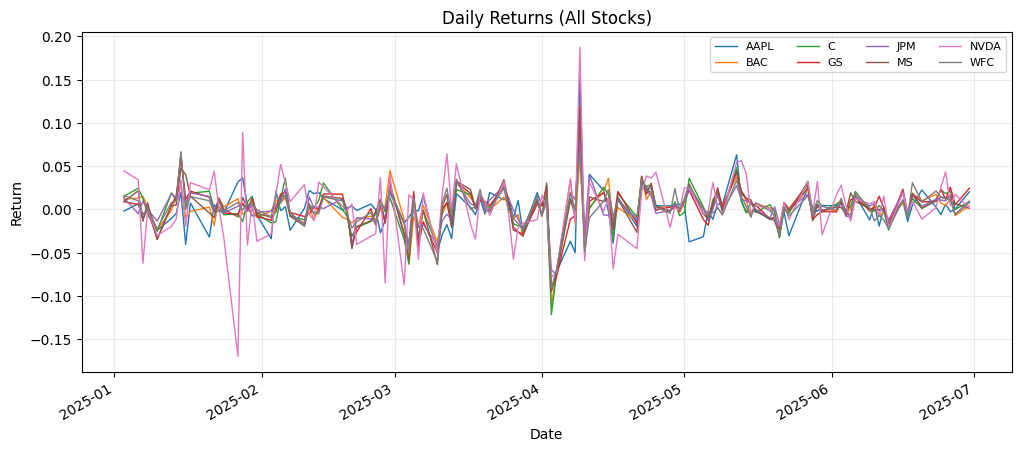

In [18]:
# ---- 4) Daily Returns — 1 chart, 8 lines ----
fig, ax = plt.subplots(figsize=(12, 5))

for t in daily_returns.columns:
    ax.plot(daily_returns.index, daily_returns[t], label=t, linewidth=1)

ax.set_title("Daily Returns (All Stocks)")
ax.set_xlabel("Date")
ax.set_ylabel("Return")
ax.legend(ncols=4, fontsize=8)

fig.autofmt_xdate()
plt.show()
plt.close(fig)


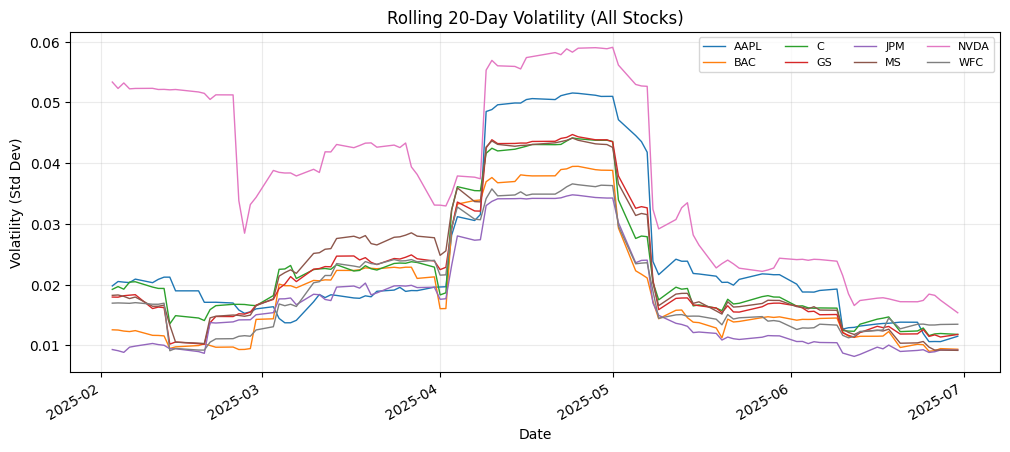

In [19]:
# ---- 5) Rolling Volatility — 1 chart, 8 lines ----
fig, ax = plt.subplots(figsize=(12, 5))

for t in rolling_vol.columns:
    ax.plot(rolling_vol.index, rolling_vol[t], label=t, linewidth=1)

ax.set_title("Rolling 20-Day Volatility (All Stocks)")
ax.set_xlabel("Date")
ax.set_ylabel("Volatility (Std Dev)")
ax.legend(ncols=4, fontsize=8)

fig.autofmt_xdate()
plt.show()
plt.close(fig)


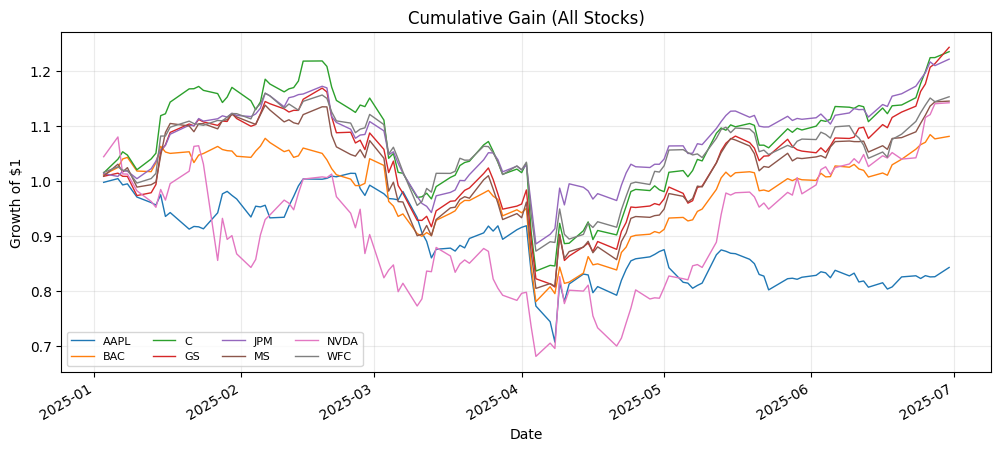

In [20]:
# ---- 6) Cumulative Gain — 1 chart, 8 lines ----
fig, ax = plt.subplots(figsize=(12, 5))

for t in cum_gain.columns:
    ax.plot(cum_gain.index, cum_gain[t], label=t, linewidth=1)

ax.set_title("Cumulative Gain (All Stocks)")
ax.set_xlabel("Date")
ax.set_ylabel("Growth of $1")
ax.legend(ncols=4, fontsize=8)

fig.autofmt_xdate()
plt.show()
plt.close(fig)